# Classification with Keras

# Step 1 - Loading the Required Libraries and Modules

In [14]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 2 - Reading the Data and Performing Basic Data Checks

In [41]:
df = pd.read_csv('diabetes.csv') 
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Dpf,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Pre-Processing Data

In [38]:
for i in df.columns:
   missing_data=df[i].isnull().sum()
   percent_missing=(missing_data/len(df))*100
   print(i+' missing:',missing_data,"values",",percent", percent_missing)

Pregnancies missing: 0 values ,percent 0.0
Glucose missing: 0 values ,percent 0.0
BloodPressure missing: 0 values ,percent 0.0
SkinThickness missing: 0 values ,percent 0.0
Insulin missing: 0 values ,percent 0.0
BMI missing: 0 values ,percent 0.0
Dpf missing: 0 values ,percent 0.0
Age missing: 0 values ,percent 0.0
Outcome missing: 0 values ,percent 0.0


<AxesSubplot:>

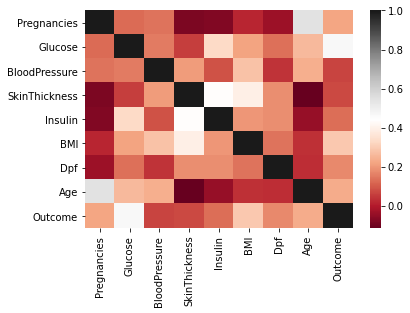

In [33]:
import seaborn as sns
sns.heatmap(df.corr(),cmap = 'RdGy')

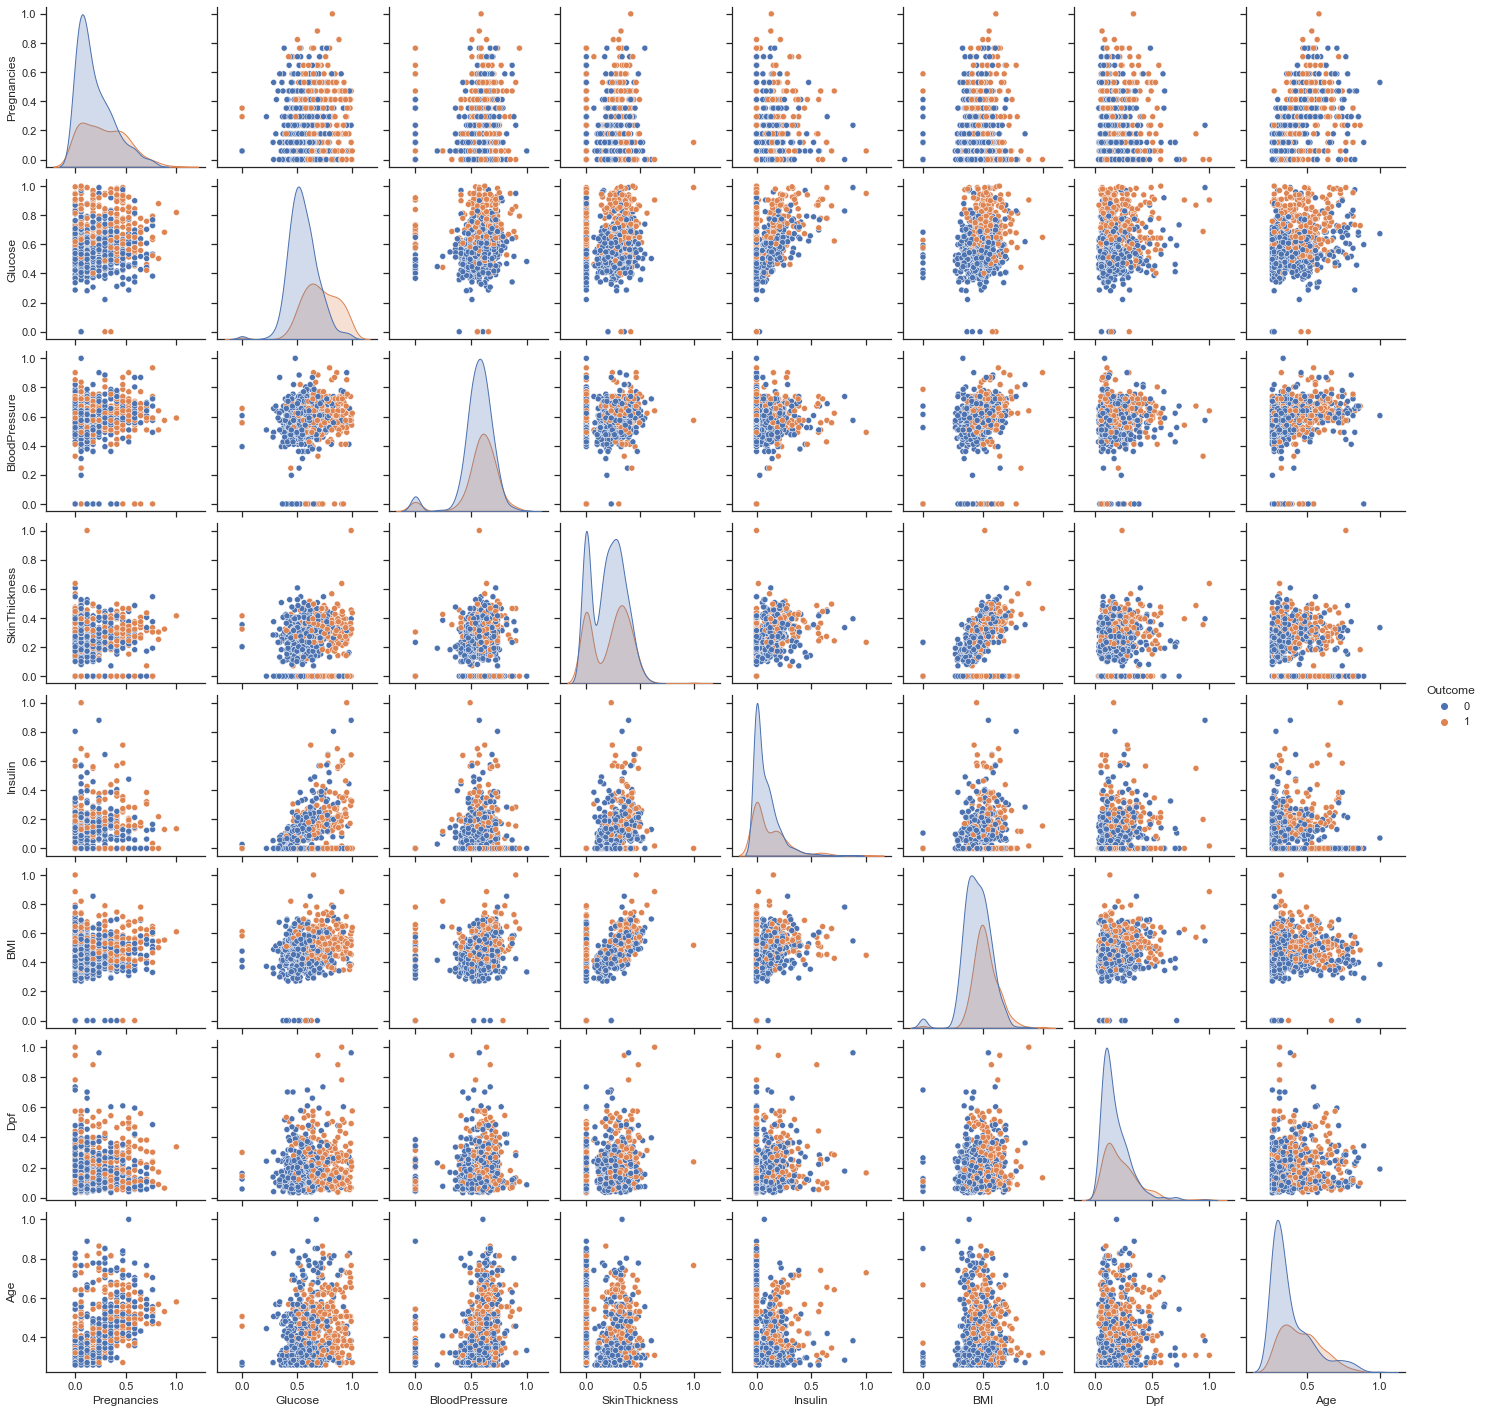

In [35]:
sns.set_theme(style="ticks")
sns.pairplot(df,hue='Outcome')

# Step 3 - Creating Arrays for the Features and the Response Variable.

In [25]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df[predictors] 

,SkinThickness,BloodPressure,Dpf,Insulin,Glucose,BMI,Age,Pregnancies
0,0.353535,0.590164,0.259091,0.000000,0.743719,0.500745,0.617284,0.352941
1,0.292929,0.540984,0.145041,0.000000,0.427136,0.396423,0.382716,0.058824
2,0.000000,0.524590,0.277686,0.000000,0.919598,0.347243,0.395062,0.470588
3,0.232323,0.540984,0.069008,0.111111,0.447236,0.418778,0.259259,0.058824
4,0.353535,0.327869,0.945455,0.198582,0.688442,0.642325,0.407407,0.000000
...,...,...,...,...,...,...,...,...
763,0.484848,0.622951,0.070661,0.212766,0.507538,0.490313,0.777778,0.588235
764,0.272727,0.573770,0.140496,0.000000,0.613065,0.548435,0.333333,0.117647
765,0.232323,0.590164,0.101240,0.132388,0.608040,0.390462,0.370370,0.294118
766,0.000000,0.491803,0.144215,0.000000,0.633166,0.448584,0.580247,0.058824


# Step 4 - Creating the Training and Test Datasets

In [26]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [27]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


# Step 5 - Define, Compile, and Fit the Keras Classification Model

In [28]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
# build the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.6667
Epoch 2/20
17/17 [==============================] - 0s 935us/step - loss: 0.6293 - accuracy: 0.6685
Epoch 3/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.6853
Epoch 4/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.6965
Epoch 5/20
17/17 [==============================] - 0s 997us/step - loss: 0.5535 - accuracy: 0.7374
Epoch 6/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7374
Epoch 7/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5116 - accuracy: 0.7542
Epoch 8/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7654
Epoch 9/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7803
Epoch 10/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7784
Epoch 11/20
17/

# Step 6 - Predict on the Test Data and Compute Evaluation Metrics;

In [30]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.8026070594787598% 
 Error on training data: 0.19739294052124023
Accuracy on test data: 0.761904776096344% 
 Error on test data: 0.238095223903656
